<a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_10_Multi-band_Raster_Data-Passive_Remote_Sensing.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/bamacgabhann/GY4006/main/gy4006/assets/images/GY4006_logo_1.png" align=center alt="UL Geography logo"/>

# Multi-band Raster Data: Passive Remote Sensing

In the *Introduction to Raster Data* Notebook, we used a satellite photograph as our first step in working with raster data. In the *Single-band Raster Data* Notebook, we then looked at rasters with a single band or dataset - elevation data first, and then temperature data.

However, the photographs we used in the *Introduction to Raster Data* Notebook actually had three bands, not just a single band - one band each for red, green, and blue colour.

This is actually multi-band passive remote sensing data, the subject of this Notebook.

We saw in the photographs how each raster had separate arrays for red, green and blue - that's our three bands, hence multi-band. But what do I mean by *passive remote sensing?*

The *sensing* part is using an instrument to collect data. A camera counts: it has a sensor which records values for the intensity of red, green, and blue light collected.

The *remote* part simply means "at a distance". We're not taking a reading in contact with the object we're measuring, like when we put a ruler across something to measure it's size. We're doing it from far away. A satellite is pretty far above the Earth when it takes a photo: that definitely counts as remote. 

The *passive* part means that the instrument is not transmitting a signal - just receiving. The satellite taking the photograph isn't shining a light onto the Earth - it's taking advantage of another source of light. The sun illuminates the Earth, and some of the sunlight is reflected from the ground back into space, where it can be collected by cameras on satellites.

We can take a step back here, and think about everything which has to happen in order for a remote sensing instrument to receive data.

1. A source of energy emits that energy
2. That energy travels from the source to the target
3. The energy interacts in some way with the target
4. The energy travels from the target to the sensor
5. The sensor records the energy as data
6. The data is processed
7. The processed data is analysed

For most remote sensing, the energy is part of the electromagnetic spectrum. That's absolutely not always the case - seismographs measure vibrations (basically sound energy) to monitor earthquakes, and seismic surveys by oil and gas companies do the same. Some satellites measure gravity. We won't be looking at any of that data, though.

The electromagnetic spectrum includes the visible light we can see; plus higher-energy ultraviolet, X-rays, and gamma rays; and lower energy infrared and radio waves. There are passive remote sensing instruments across this entire range: however, some of these like X-rays and gamma rays are mostly used in astronomy.

In this Notebook, we will focus on visible and infrared light.

The source of energy in passive remote sensing of visible and infrared light is, as we said, the Sun. So, breaking down into our list again:

1. The sun emits energy.
The Sun emits energy across most of the electromagnetic spectrum. There's some minor details if you're interested in solar astronomy, but for our purposes, we don't have to worry about this. It's not a case that the Sun emits more green light than red light: for our purposes, we can consider it essentially even, as white light.

2. Some of that energy travels to Earth.

Travel from the Sun to Earth is mostly insignificant; however, once the signal reaches Earth, it has to travel through the atmosphere before reaching the ground. This does have some effects; some light bounces off air molecules in the atmosphere, mostly blue light - which is why the sky is blue when you look up - well, unless it's cloudy, I suppose. Which is really the major issue - clouds block the light, and satellite photographs of a cloudy area will just show...clouds. Not the ground surface. 

I'll skip a step here to note that the same thing will happen at:

4. Energy travels from the target to the sensor.
For satellite sensors, the energy must travel all the way back through the atmosphere. There are other remote sensing platforms - aircraft and UAVs can take photographs using the light that manages to get through the clouds, and can sit below clouds so they don't need to worry about them. There's also instruments like cameras which can be used on the ground.

5. When the data is received by the sensor, of course the sensitivity and resolution of the sensor control what can be recorded. Again, we can use the example of a camera, and remember how good cameras on phones are now compared to over a decade ago - more megapixels means better data, and similar.

6. The processing is not something most people working with data really need to get into - but the first stage would be things like adding geographic information. There can also be correction to account for the effects of passing through the atmosphere.

7. The analysis is the bit that we do.


The skipped step is crucial, though:

3. The energy interacts with the target.
This is the key step. There's essentially three things which can happen here.
    1. The energy can be *transmitted*, passing through the target completely.
    2. The energy can be *absorbed* by the target.
    3. The energy can be *reflected* by the target.

We discussed an example of transmitted energy in the Single-Band Raster Data Notebook - how some RADAR signals can pass through tree canopies. This will then reach another target - in that case, the ground.

Whether the signal is ultimately absorbed or reflected is something we have a word for, when it comes to visible light: colour.

Plants are green because they *reflect* green light, but *absorb* blue and red light. So when white light from the sun hits a plant, we see only the reflected green light. Similarly, tomatoes are red because they absorb the green and blue but reflect the red light. Objects which are other colours reflect some combinations, for example purple objects reflect both red and blue. White objects reflect all light, and black objects absorb it all.

But - this only refers to the visible colours we can see. What about the infrared?

Exactly the same thing happens - we just can't see it. But we have sensors which can. 

## 1. Multispectral Imaging (MSI)

The satellite image we used for Killarney in the *Introduction to Raster Data* Notebook wasn't actually a true photograph. It was a combination of red, green, and blue bands collected by one of the Sentinel-2 satellites, part of the EU's Copernicus Earth Observation programme. The Sentinel-2 satellites don't just collect visible light - they are *Multispectral Imaging* satellites, which actually collect data in 13 different bands. As well as red, green, and blue visible light, there's one band at the ultraviolet edge of blue light, and nine different bands of infrared light. You can think of this as nine different infrared colours.

Let's look at the full dataset for Killarney.

**Note**
Again, I just want to reinforce that you don't have to understand the code here - and honestly, ```rasterio``` is very, *very* user unfriendly, so I really don't want you to get discouraged by this. 

Instead, it's the *concepts* which are important here - and those will be shared across essentially all GIS platforms.

In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install osmnx earthpy rasterio

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import pandas as pd
from shapely.geometry import box
import osmnx as ox
import earthpy.spatial as es
import rasterio as rio
from rasterio.plot import show
from rasterio.features import dataset_features

In [2]:
band01 = rio.open('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_B01.tiff')
band02 = rio.open('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_B02.tiff')
band03 = rio.open('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_B03.tiff')
band04 = rio.open('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_B04.tiff')
band05 = rio.open('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_B05.tiff')
band06 = rio.open('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_B06.tiff')
band07 = rio.open('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_B07.tiff')
band08 = rio.open('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_B08.tiff')
band09 = rio.open('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_B09.tiff')
band11 = rio.open('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_B11.tiff')
band12 = rio.open('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_B12.tiff')
band8A = rio.open('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_B8A.tiff')

RasterioIOError: HTTP response code: 404

NameError: name 'band01' is not defined

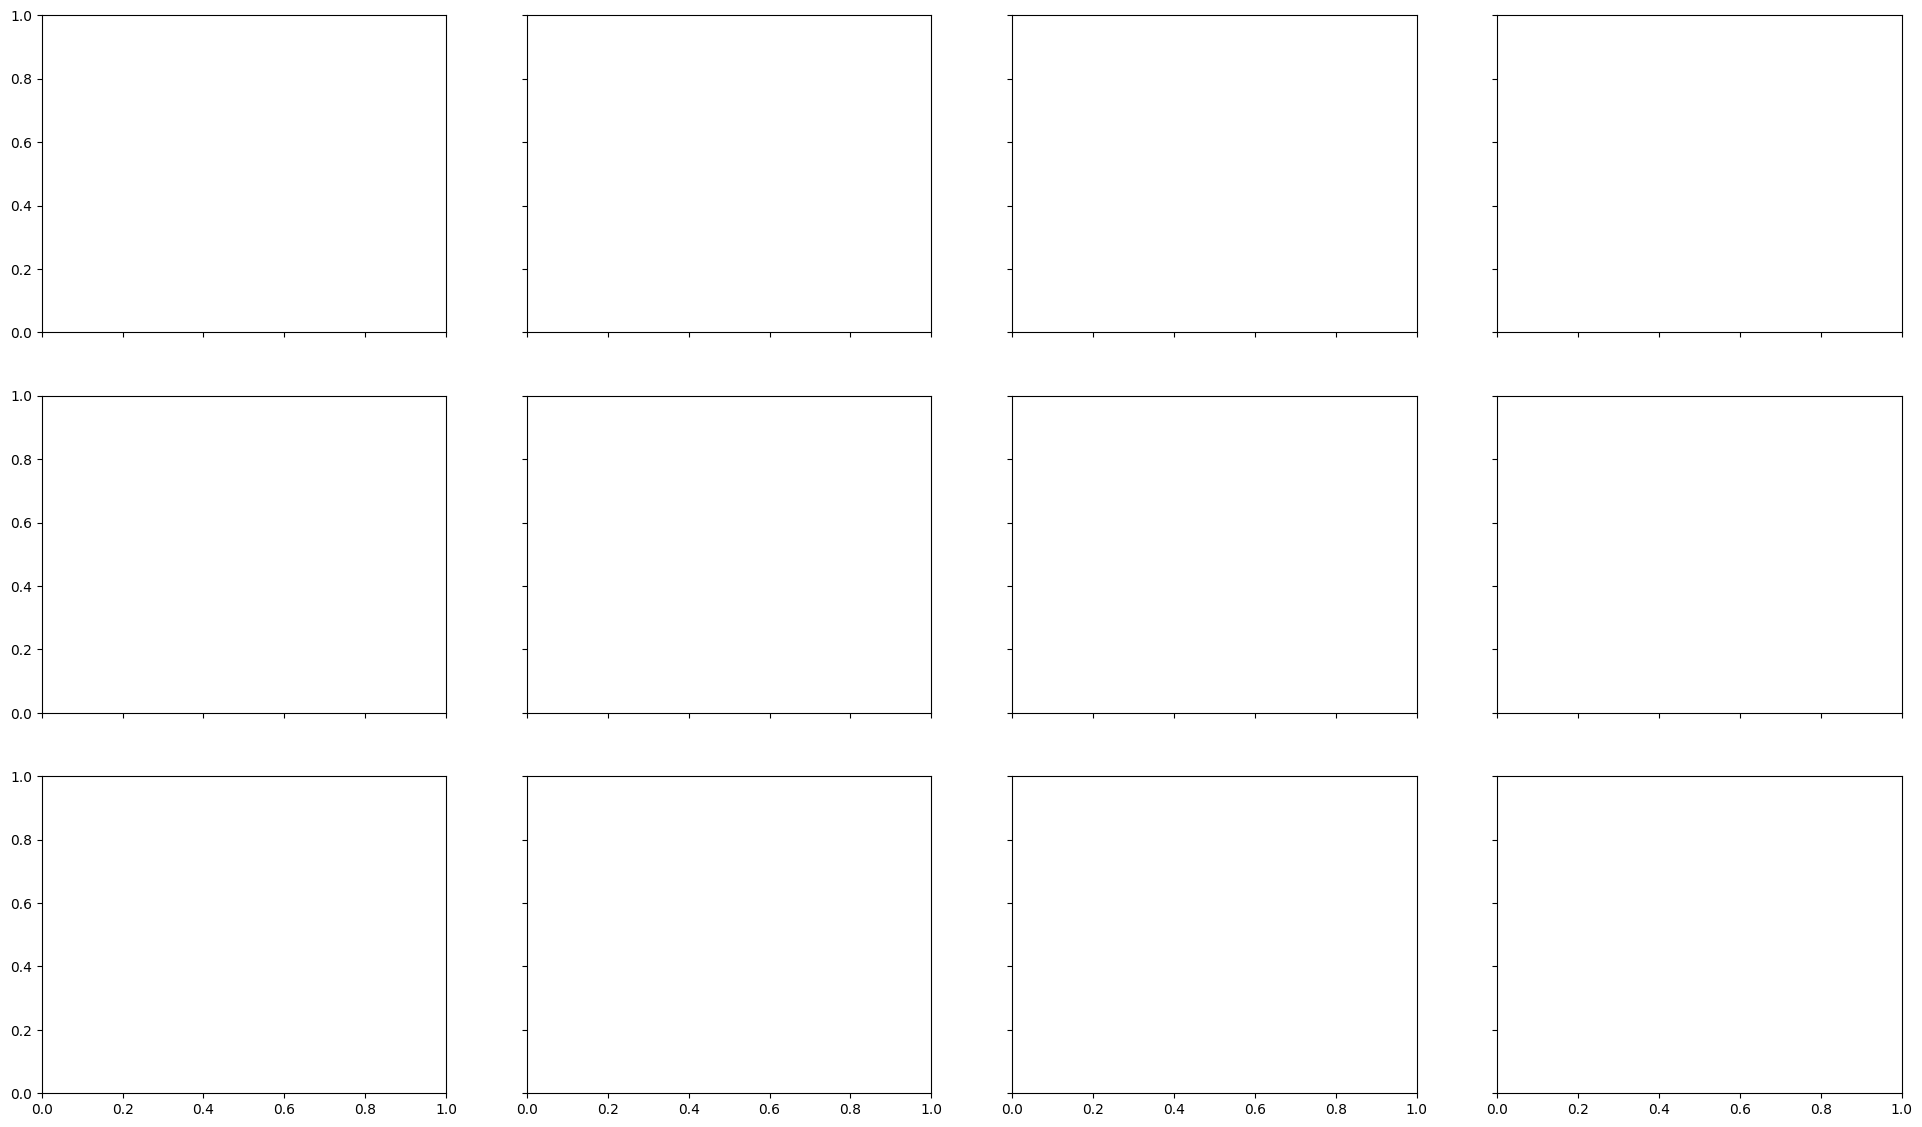

In [3]:
fig, ((ax01, ax02, ax03, ax04), (ax05, ax06, ax07, ax08), (ax09, ax11, ax12, ax8A)) = plt.subplots(3,4, figsize=(24,14), sharex=True, sharey=True)

show((band01, 1), ax=ax01, cmap='Purples', title='B01 (Blue/UV edge, 60m)')
show((band02, 1), ax=ax02, cmap='Blues', title='B02 (Blue visible light, 10m)')
show((band03, 1), ax=ax03, cmap='Greens', title='B03 (Green visible light, 10m)')
show((band04, 1), ax=ax04, cmap='Reds', title='B04 (Red visible light, 10m)')
show((band05, 1), ax=ax05, cmap='Greys', title='B05 (Red edge, 20m)')
show((band06, 1), ax=ax06, cmap='Greys', title='B06 (Red edge, 20m)')
show((band07, 1), ax=ax07, cmap='Greys', title='B07 (Red edge, 20m)')
show((band08, 1), ax=ax08, cmap='Greys', title='B08 (Near Infrared (NIR), 10m)')
show((band09, 1), ax=ax09, cmap='Greys', title='B09 (Near Infrared (NIR), 60m)')
show((band11, 1), ax=ax11, cmap='Greys', title='B11 (Short Wave Infrared (SWIR), 20m)')
show((band12, 1), ax=ax12, cmap='Greys', title='B12 (Short Wave Infrared (SWIR), 20m)')
show((band8A, 1), ax=ax8A, cmap='Greys', title='B8A (Narrow Near Infrared (NIR), 20m)')

for ax in fig.axes:
    ax.ticklabel_format(style='plain')
    ax.set_xlim(452100, 467700)
    ax.set_ylim(5758000, 5769500)
    ax.title.set_size('medium')

plt.show()

Three things to say here. 

First, only bands 01-04 are visible light. B01 captures a narrow region at the UV edge of blue light; and B02, B03, and B04 are our blue, green, and red light.  I've shown these in appropriate colours. B05 and B06 are on the edge between red and infrared, and the other bands are fully infrared 'colours': and I've shown those in grey above because we don't have a colour language for them.

The image below shows the visible light spectrum and the near and shortwave infrared, with the ranges of the Sentinel 2 bands:

<img src="https://raw.githubusercontent.com/bamacgabhann/GY5021/2024/GY5021/2_Raster_Geospatial_Data/sample_data/S2_bands.png" align=center alt="Sentinel 2 band ranges"/>

In each of the images above, you should be able to see that different parts of the area are lighter or darker in that particular colour - and the patterns are not identical across all of the images. What's lighter in some is darker than others; some features are visible on one image, but not another. This is because different objects have different colours, whether in visible or infrared light.

Second, you might notice that there is no Band 10 image in the maps above. This is because the data I've given here as the sample has been processed to what's referred to as *L2A* (Level 2 A). It's not crucial to understand all the data processing steps, but *L1C* (Level 1 C) data is essentially the data processed to the correct geographic area, with no further corrections; *L2A* data has been further processed to remove the effects of the signal travelling through the atmosphere. Band 10 is used for looking *at* the atmosphere - so the *L2A* correction essentially removes all data from Band 10, hence why it isn't shown above. 

Third, this is a rather awkward way of showing everything - I have to specify each image individually. That's fine for a one off, but if I want to do more with it, it's going to get awkward. 

Each of the images is a raster which stores only a single band. But it's all showing the same area - so why not make it a single multiband raster? That's really what it is.

In [4]:
meta = band01.meta
meta.update(count=13)

B01 = {'band': 'B01', 'index': 1, 'file': 'https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_B01.tiff'}
B02 = {'band': 'B02', 'index': 2, 'file': 'https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_B02.tiff'}
B03 = {'band': 'B03', 'index': 3, 'file': 'https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_B03.tiff'}
B04 = {'band': 'B04', 'index': 4, 'file': 'https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_B04.tiff'}
B05 = {'band': 'B05', 'index': 5, 'file': 'https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_B05.tiff'}
B06 = {'band': 'B06', 'index': 6, 'file': 'https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_B06.tiff'}
B07 = {'band': 'B07', 'index': 7, 'file': 'https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_B07.tiff'}
B08 = {'band': 'B08', 'index': 8, 'file': 'https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_B08.tiff'}
B09 = {'band': 'B09', 'index': 9, 'file': 'https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_B09.tiff'}
B11 = {'band': 'B11', 'index': 11, 'file': 'https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_B11.tiff'}
B12 = {'band': 'B12', 'index': 12, 'file': 'https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_B12.tiff'}
B8A = {'band': 'B8A', 'index': 13, 'file': 'https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_B8A.tiff'}

with rio.open('../sample_data/2021-04-25_11-46-59_Sentinel-2_L2A.tif', 'w', **meta) as dst:
    bands = [B01, B02, B03, B04, B05, B06, B07, B08, B09, B11, B12, B8A]
    for band in bands:
        b = rio.open(band['file'])
        dst.write(b.read(1), band['index'])
        dst.set_band_description(band['index'], band['band'])
        b.close()


NameError: name 'band01' is not defined

I set Band 8A to be indexed as band 13 in this combined raster, because otherwise it would end up as band 9, with Band 09 as band 10 and so on which would get confusing very quickly. 

In [5]:
killarney = rio.open('../sample_data/2021-04-25_11-46-59_Sentinel-2_L2A.tif')
killarney.meta

RasterioIOError: ../sample_data/2021-04-25_11-46-59_Sentinel-2_L2A.tif: No such file or directory

Now, we can do some interesting things with the data a bit more easily.

## 2. Data Cleaning

Unfortunately there's one more preliminary step we have to do, and that's a little bit of data cleaning. 

All of the values contained in our rasters should be floating point numbers between 0 and 1. However, as a consequence of the preliminary data processing to L2A, some of the values have been increased above 1. 

We can see this if we as ```rasterio``` to show us all values above 1:

In [6]:
killarney.read()[killarney.read()>1]

NameError: name 'killarney' is not defined

That looks like a lot, but for context:

In [7]:
killarney.read()[killarney.read()>1].shape

NameError: name 'killarney' is not defined

That means there's 740 values above 1. The whole dataset, though:

In [8]:
killarney.read().shape

NameError: name 'killarney' is not defined

It's actually 12 bands, since band 10 is empty, but that's still 12 x 1148 x 1549 pixels: a total of 21,339,024.

740 errors in over 21 million is a pretty good ratio, really.

Anyway, we can easily fix this issue by just setting all these values to 1:

In [9]:
k = killarney.read()
k[k>1]=1.0
kmeta=killarney.meta
with rio.open('../sample_data/2021-04-25_11-46-59_Sentinel-2_L2A.tif', 'w', **kmeta) as dst:
    dst.write(k)

NameError: name 'killarney' is not defined

And just to check it worked:

In [10]:
killarney = rio.open('../sample_data/2021-04-25_11-46-59_Sentinel-2_L2A.tif')
killarney.meta

RasterioIOError: ../sample_data/2021-04-25_11-46-59_Sentinel-2_L2A.tif: No such file or directory

In [11]:
killarney.read()[killarney.read()>1]

NameError: name 'killarney' is not defined

Empty array means it worked!

It is important to do things like this, because if you want to do a calculations involving subtraction and division, you could end up with some unfortunate errors. 

Anyway, let's get on with the fun parts.

## 3. False Colour Visualisations

The problem with trying to look at 12 or 13 different colours, including a number of infrared colours, is that we can only see three different colours. Every colour is a combination of red, green, and blue.

But just because an image has been captured in a colour we're unable to see, doesn't mean we can't *show* it in a colour we can see. That's essentially what I did above, showing the infrared colours in grey. But we can show them in any colour we want to.

For example, here's Band 8A shown in green.

NameError: name 'killarney' is not defined

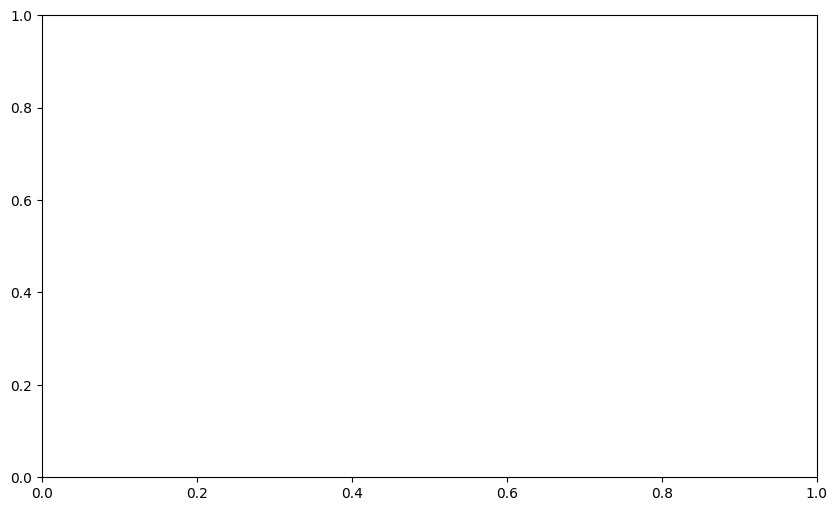

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
show((killarney, 13), ax=ax, cmap='Greens', title='B8A (Narrow Near Infrared (NIR), 20m)')
ax.ticklabel_format(style='plain')
plt.show()

And here's the blue light Band 02 shown in red:

NameError: name 'killarney' is not defined

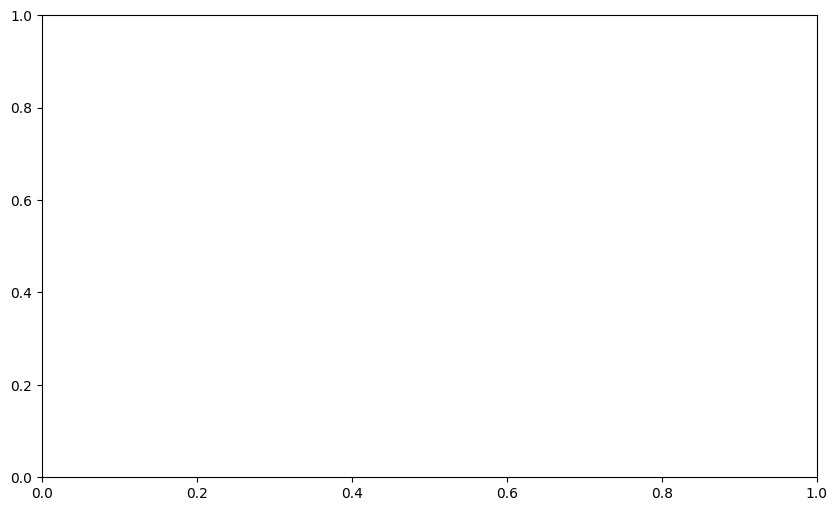

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
show((killarney, 2), ax=ax, cmap='Reds', title='B02 (Blue visible light, 10m)')
ax.ticklabel_format(style='plain')
plt.show()

In these cases, I'm specifying which single colour to use - but we don't have to stick with just one colour at a time. If Rasterio is passed 3 bands, it treats them as RGB - and of course, there's no law saying we can only pass red, green, and blue as RGB. 

For example, here's a commonly used false colour combination based on bands 8, 4, and 3. This shows Band 08 (NIR) as red, Band 04 (red light) as green, and band 03 (green light) as blue.

(Rasterio expects the bands to be presented in the order red, green, blue - hence 8, 4, 3 in that order.)

NameError: name 'killarney' is not defined

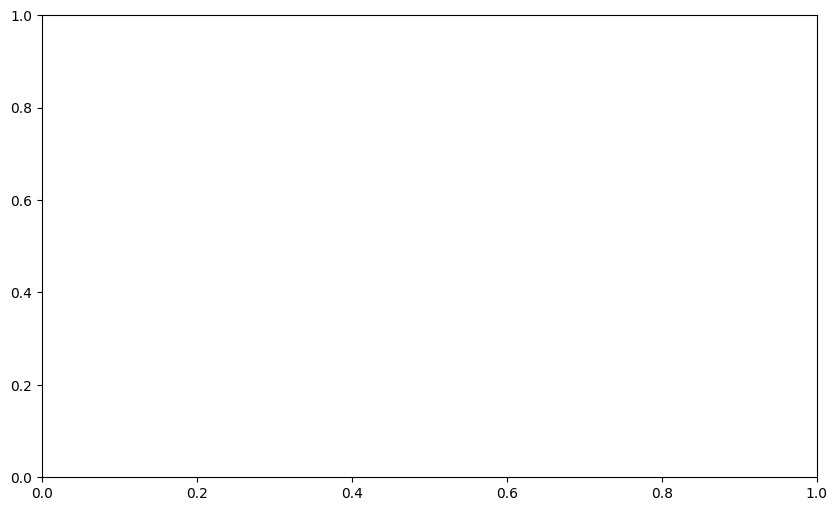

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
show((killarney, [8,4,3]), ax=ax, title='False colour visualisation (B08, B04, B03)')
ax.ticklabel_format(style='plain')
plt.show()

And here's a commonly used visualisation referred to a SWIR (Short Wave Infrared), based on Band 12 (SWIR), Band 8A (NIR), and Band 04 (red light):

NameError: name 'killarney' is not defined

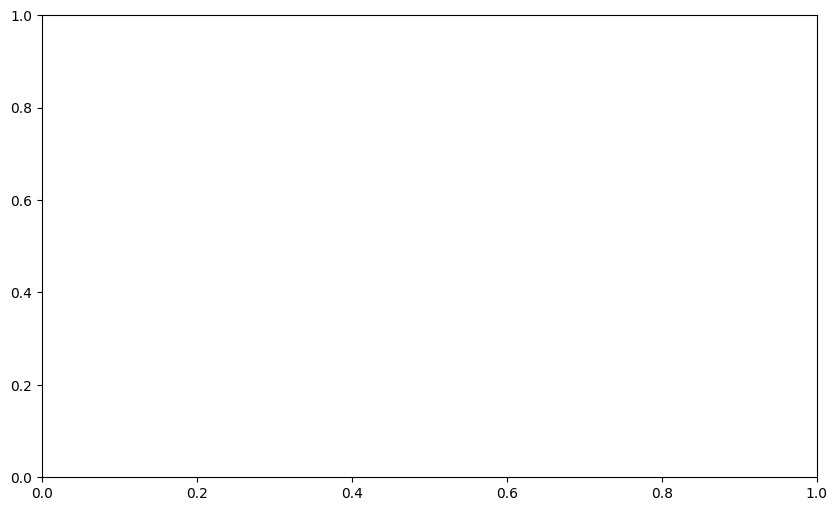

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
show((killarney, [12,13,4]), ax=ax, title='SWIR visualisation (B12, B8A, B04)')
ax.ticklabel_format(style='plain')
plt.show()

This SWIR visualisation is extremely useful for distinguishing clouds, snow, and ice in areas where those are present (which all look white in RGB images, but show quite differently in SWIR). It's also useful for disinguishing different kinds of vegetation, and different kinds of rocks - as well as something in the National Park area which I'm quite sure you've noticed there, and are wondering about. Hold that thought.

Here's one for you too play with a little more easily. 

NameError: name 'killarney' is not defined

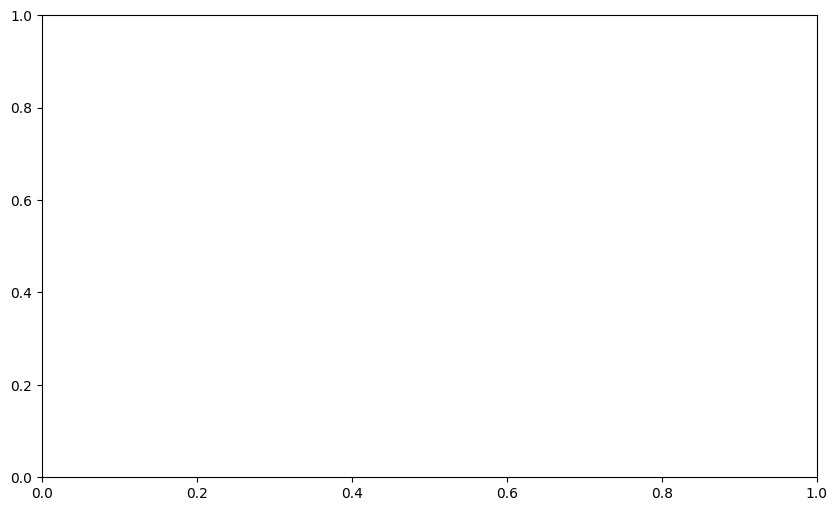

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
show((killarney, [

# Change this number to the band you want to show in Red    
    9

,# Change this number to the band you want to show in Green    
    6

,# Change this number to the band you want to show in Blue    
    1
    
]), ax=ax, title='Custom visualisation')
ax.ticklabel_format(style='plain')
plt.show()

It would be impossible for me to list all the combinations and what they're useful for, in exactly the same way that I wouldn't be able to list how to identify objects by their colour. It's too varied, there's just too many things. There's many, many uses, including mapping water, urban areas, type and health of vegetation, geology, land use, and much more. This is another case of, if you have an idea in mind, look up how to do it.

## 4. Indices

We can go further. We're not limited to the bands as they are saved in the raster file - we can do calculations with them.

Again, this is a case where there are hundreds, thousands of different calculations possible, so it's not about learning the possibilities. Once again, it's a case of, when you have something you want to do, you figure out how to do it. That said, you need to have some understanding of what's possible in order to have an idea of where to start, so I'm going to show you two examples in order to explain the concept.

**NDVI**
Possibly the best known and most-used index is the *Normalised Difference Vegetation Index*, or NDVI. This is based on just two bands: Band 08 (NIR) and Band 04 (red light). 

Instead of plotting these two bands in different colours, the index is comparing the values of the two bands. This is the *Difference* part of the index formula:

```B08 - B04```

We can plot just this part:

NameError: name 'killarney' is not defined

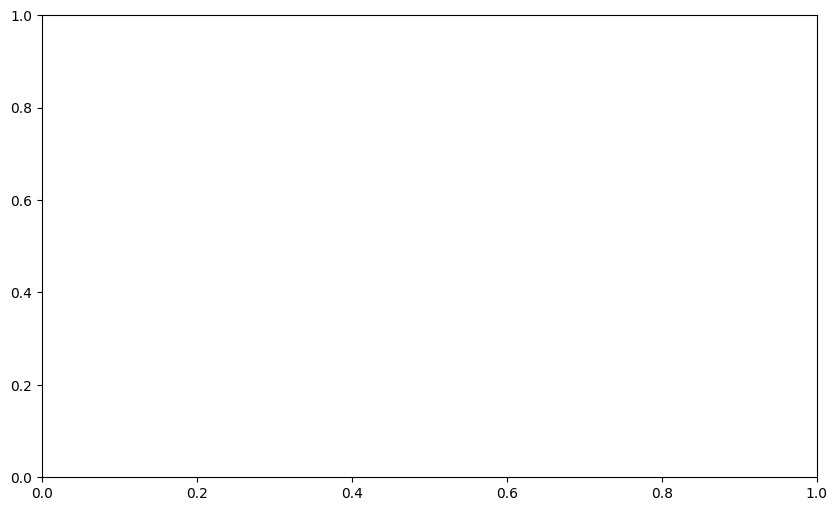

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
show((killarney.read(8)-killarney.read(4)), ax=ax, title='B08-B04')
ax.axis('off')
plt.show()

There is a problem with doing this though. Say we have two pixels. 

In the first, ```B08``` is 0.8, and ```B04``` is 0.7.

In the second, ```B08``` is 0.2, and ```B04``` is 0.1.

In both cases, ```B08 - B04``` gives 0.1 - but that's now hiding the very different original values in ```B08``` and ```B04``` in the two pixels.

To avoid this, what we do is to *normalise* the numbers based on the total of their original values, i.e. ```B08 + B04```. Doing this means the 0.1 from our first pixel will be divided by 0.8+0.7 which totals to 1.5, giving a result of 0.667; while the 0.1 from our second pixel will be divided by 0.2+0.1 = 0.3, giving a result of 0.333. 

So, the total formula is ```(B08 - B04) / (B08 + B04)```.

This also gives us a good, fixed scale. The maximum that ```B08 - B04``` can be is -1, in the case where ```B08``` is 0 and ```B04``` is 1 - since both vary between 0 and 1. Similarly, the minumum is the case where ```B08``` is 1 and ```B04``` is 0, meaning ```B08 - B04 = 1```. In both cases, ```B08 + B04 = 1```. So, the NDVI can vary between -1 and +1.

Let's look at the full formula result:

In [18]:
ndvi = (killarney.read(8)-killarney.read(4))/(killarney.read(8)+killarney.read(4))
ndvi_meta = killarney.meta
ndvi_meta.update(count=1)

with rio.open('../sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_NDVI.tif', 'w', **ndvi_meta) as dst:
    dst.write(ndvi, 1)
    dst.set_band_description(1, 'NDVI')


NameError: name 'killarney' is not defined

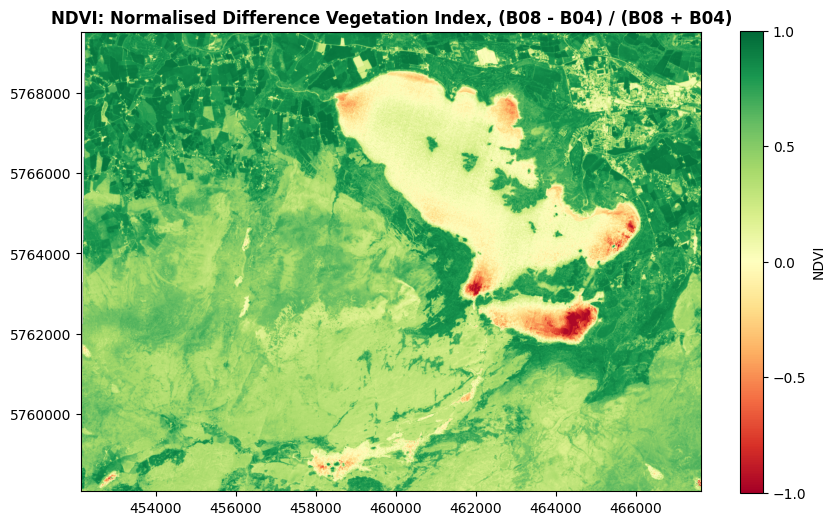

In [19]:
killarney_NDVI = rio.open('../sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_NDVI.tif')
fig, ax = plt.subplots(figsize=(10, 6))

temp_scale_setup = ax.imshow(killarney_NDVI.read()[0], cmap='RdYlGn', vmin=-1, vmax=1)
cb = fig.colorbar(temp_scale_setup, ax=ax, label="NDVI")
cb.set_ticks([-1, -0.5, 0, 0.5, 1])

show((killarney_NDVI, 1), ax=ax, title='NDVI: Normalised Difference Vegetation Index, (B08 - B04) / (B08 + B04)', cmap='RdYlGn', vmin=-1, vmax=1)
ax.ticklabel_format(style='plain')
plt.show()

As you might guess from the name, the NDVI is excellent at distinguishing vegetation. Values close to 1 indicate strong vegetation like forestry. Low positive numbers generally indicate grasslands and shrubs, while bare soil, rock, and water will usually have negative values.

**NDMI**

Similarly, we can calculate the *Normalised Difference Moisture Index*, using bands B8A and B11.

In [20]:
ndmi = (killarney.read(13)-killarney.read(11))/(killarney.read(13)+killarney.read(11))

ndmi_meta = killarney.meta
ndmi_meta.update(count=1)

with rio.open('../sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_NDMI.tif', 'w', **ndvi_meta) as dst:
    dst.write(ndvi, 1)
    dst.set_band_description(1, 'NDMI')

killarney_NDMI = rio.open('../sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_NDMI.tif')
fig, ax = plt.subplots(figsize=(10, 6))

temp_scale_setup = ax.imshow(killarney_NDMI.read()[0], cmap='jet_r', vmin=-1, vmax=1)
cb = fig.colorbar(temp_scale_setup, ax=ax, label="NDMI")
cb.set_ticks([-1, -0.5, 0, 0.5, 1])

show((killarney_NDMI, 1), ax=ax, title='NDMI: Normalised Difference Moisture Index, (B8A - B11) / (B8A + B11)', cmap='jet_r', vmin=-1, vmax=1)
ax.ticklabel_format(style='plain')
plt.show()

NameError: name 'killarney' is not defined

You might be wondering why the lake isn't showing up solid red, and that's because it's a *moisture* index, not a *water* index - it's very good at highlighting moisture in vegetation. So, strong blue colours here will represent vegetation with a lot of water, while light blues to greens will represent drier vegetation suffering from water stress. Green to red colours generally show non-vegetated areas.

There's many, many more where these came from - I just wanted to use these two as examples. There's a great list curated on GitHub which you can find here: https://github.com/awesome-spectral-indices/awesome-spectral-indices

## 5. Segmentation

We can go beyond indices, and do more complex calculations to identify particular features in our imagery. 

Again, I'll demonstrate with an example. We'll start by doing a band calculation similar to the NDVI or NDMI indices:

In [21]:
segmented = (killarney.read(12)-killarney.read(11))/(killarney.read(12)+killarney.read(11)+0.25)

NameError: name 'killarney' is not defined

Now we apply a *threshold* value - setting any pixels below that value as np.nan, *Not a Number*. This leaves only the data we're interested in, i.e. the areas where the pixel value is higher than our threshold.

In [22]:
segmented[segmented<0.04]=np.nan

NameError: name 'segmented' is not defined

We can plot this on a map - and let's add an RGB basemap, so that we have something to see where our ```segmented``` raster values are ```np.nan```.

NameError: name 'killarney' is not defined

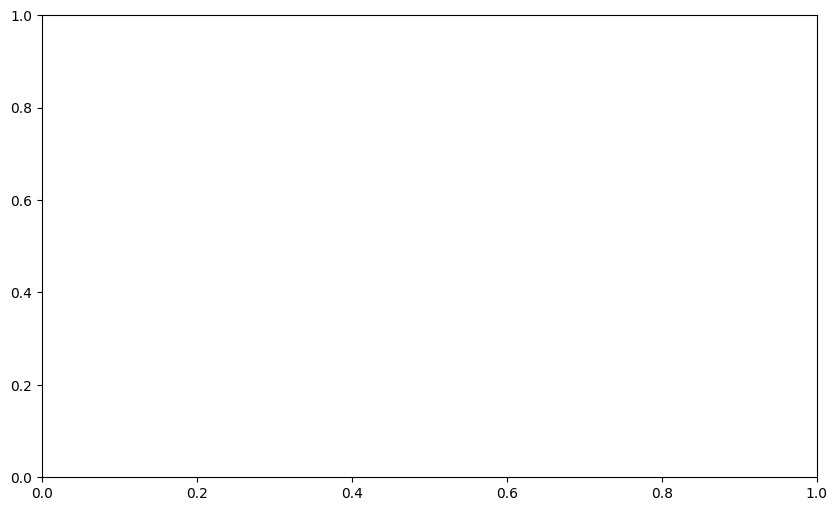

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
killarney.read()
show(k[1:4][::-1]*2.5, transform=killarney.transform, ax=ax)
show(segmented, transform=killarney.transform, ax=ax, title='Killarney Wildfire 25 April 2021', cmap="Reds_r")

ax.ticklabel_format(style='plain')
plt.show()

You can see the red areas on the map, I hope - and you can also see the title. This process has isolated pixels which are interpreted as showing active wildfire burning. 

I can confirm their accuracy: I was there at the time. I'm in that photo, somewhere. Just a bit too small to make out!

We can save this as a file:

In [24]:
fire_meta = killarney.meta
fire_meta.update(count=1)

with rio.open('../sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_fire.tif', 'w', **fire_meta) as dst:
    dst.write(segmented, 1)
    dst.set_band_description(1, 'Wildfire 2021-04-25')

NameError: name 'killarney' is not defined

Now, we didn't actually *have* to do the thresholding there. We could have just shown the result of the calculation, without the threshold:

In [25]:
calc = (killarney.read(12)-killarney.read(11))/(killarney.read(12)+killarney.read(11)+0.25)
fig, ax = plt.subplots(figsize=(10, 6))

show(calc, transform=killarney.transform, ax=ax, title='Killarney Wildfire 25 April 2021', cmap="Reds_r")

ax.ticklabel_format(style='plain')
plt.show()

NameError: name 'killarney' is not defined

We can still see the active fire pixels are much brighter there, but the rest of the map isn't telling us anything useful. Much better to isolate the useful pixels, and show only them.

We can also create an array of *Boolean* values, listing ```False``` for non-fire and ```True``` for fire pixels. This would commonly be referred to as a *mask* - such Boolean data is used to mask out (i.e. hide) pixels with a Boolean value of False in the mask data.

In [26]:
fire_shape = (killarney.read(12)-killarney.read(11))/(killarney.read(12)+killarney.read(11)+0.25)
fire_shape[fire_shape<0.04]=0
fire_shape[fire_shape>0.04]=1
fire_mask = fire_shape.astype(bool)
fire_mask

NameError: name 'killarney' is not defined

Something along these lines is often a key step in building maching learning models, where the computer would be essentially learning where particular values are ```True```, and using that to predict where values would be ```True``` elsewhere.

I'm not going any further into machine learning though. More usefully for our purposes right now, we can create vector shapes for the fire areas:

In [27]:
fire_shape[fire_shape==0]=np.nan

with rio.open('../sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_fire_shape.tif', 'w', **fire_meta) as dst:
    dst.write(fire_shape, 1)
    dst.set_band_description(1, 'Fire')

fireshapes_raster = rio.open('../sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_fire_shape.tif')
fireshapes_df = dataset_features(fireshapes_raster, bidx=1, band=True, as_mask=False, with_nodata=False, geographic=False)
fire_vector = gpd.GeoDataFrame.from_features(fireshapes_df,crs=32629)
fire_vector = fire_vector[fire_vector['val']==1.0]
fire_vector = fire_vector.drop(columns=['val', 'filename'])
fire_vector['Fire']=True
fire_vector.to_file('../sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_fire_vector.gpkg')

NameError: name 'fire_shape' is not defined

NameError: name 'killarney' is not defined

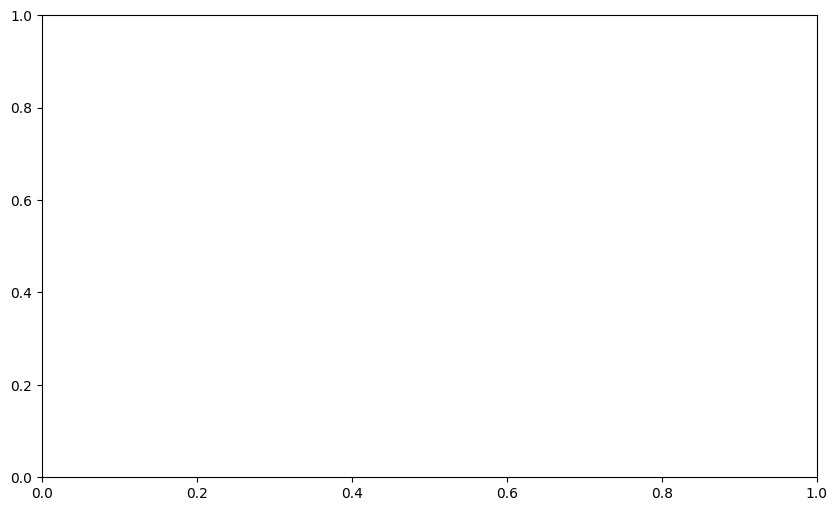

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
killarney.read()
show(k[1:4][::-1]*2.5, transform=killarney.transform, ax=ax)
fire_vector.plot(ax=ax, color='Red')

ax.ticklabel_format(style='plain')
plt.show()

Once you have vector shapes, more geoprocessing options become open:

In [29]:
sum(fire_vector.geometry.area)

NameError: name 'fire_vector' is not defined

That's how many square metres were burning, when this imagery was collected.

Of course, we can also combine some of the data we've just analysed with some of the data from the Single-band Raster Data Notebook:

In [30]:
dem = rio.open('https://raw.githubusercontent.com/bamacgabhann/GY4006/main/gy4006/sample_data/Killarney/DEM_COPERNICUS_30.tiff')
shade = es.hillshade(dem.read(1), azimuth=270, altitude=30)
bounds  = gpd.GeoDataFrame({"id": 1, "geometry":[box(*dem.bounds)]}).set_crs(32629)
killarney_roads = ox.features_from_polygon(bounds.to_crs(4326)["geometry"][0], tags={"highway": True}).to_crs(32629)

fig, ax = plt.subplots(figsize=(10, 6))

temp_scale_setup = ax.imshow(killarney_NDVI.read()[0], cmap='RdYlGn', vmin=-1, vmax=1)
cb = fig.colorbar(temp_scale_setup, ax=ax, label="NDVI")
cb.set_ticks([-1, -0.5, 0, 0.5, 1])

ax.ticklabel_format(style='plain')
ax.set_xlim(452100, 467700)
ax.set_ylim(5758000, 5769500)

show((killarney_NDVI, 1), ax=ax, title='Killarney 2021-04-25, NDVI with hillshade DEM, roads, and active wildfires', cmap='RdYlGn', vmin=-1, vmax=1)
show(shade, transform=dem.transform, ax=ax, cmap="Greys", alpha=0.3)
killarney_roads.plot(ax=ax, column="highway", cmap="gist_yarg")
fire_vector.plot(ax=ax, color='Red')

plt.show()

RasterioIOError: HTTP response code: 404

Now, how about that for a tasty map?

## Summary

So, yes, through all the raster data so far we've actually been exploring data relevant to the Killarney wildfire of April 2021. 

- We started with photographs (actually bands 04, 03, and 02 from the Sentinel 2 satellite);
- We brought in a DEM of the area;
- We looked at the land surface temperatures in the area for that month (maximum of 12°C, according to our data);
- We looked at the NDVI to see vegetation in the area (not great in the fire area, but that's mostly *after* the fire);
- We looked at the NDMI for vegetation moisture (pretty dry in the fire area);
- Finally, we extracted the shape of the active fires at the time the imagery was collected.

If wildfires is what you're interested in, there's plenty more you can do there. We could also have tried to extract the shape of the burned area - and you can see that pretty clearly on the RGB imagery. We could look at vegetation and moisture *before* wildfires, and find other places with similar vegetation and moisture which could be at risk of wildfires. We could assess the vegetation before and after the wildfire to look at the changes.

But this is only one example of how remote sensing data can be used in environmental geospatial data analysis.

Remote sensing imagery can also be used to help assess biodiversity, to monitor agriculture, to look at flooding, to map landslides, to assess water quality, to measure snow and ice cover, and to map land use. 

Even when I was doing my PhD, remote sensing data was *very* hard to work with, and not easy to get. Now? With the massive advance in computation power, as well as resources like Colab, analysis of the data has become possible for essentially anyone who wants to try. Even more importantly, we all have access to some absolutely incredible datasets. Sentinel 2A was launched in 2015, and *all* of its data is open access. Most data from the US civilian agencies is open access now as well, including LANDSAT and MODIS, and there's data available from other countries as well. 

And that's just the multispectral satellites. In the EU's Copernicus programme, there's also Sentinel 3 monitoring the oceans, Sentinel 5P monitoring the atmosphere and air pollution, and Sentinel 6 to measure sea level change - and Sentinel 1, which uses RADAR for earth observation. That's up next week for us.

The easiest way to access the data is through the <a href='https://apps.sentinel-hub.com/eo-browser/'>Copernicus Browser</a>. Copernicus is the EU's Earth Observation programme - registration is required, but it's free. US data is available from <a href='https://earthexplorer.usgs.gov/'>USGS Earth Explorer</a> or <a href='https://search.earthdata.nasa.gov/search'>NASA Earthdata</a>.

Between the availability of data, and the computing resources available to use it, the possibilities are virtually limitless. It's just a case of, what do you want to do with it?

___

GY4006 Notebooks in Colab: 

2. Data Types <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_2_Data_Types.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3. Vector Data <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_3_Vector_Data.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4. Attribute Data <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_4_Attribute_Data.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5. Coordinate Reference Systems <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_5_Coordinate_Reference_Systems.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6. Geospatial Data Files <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_6_Geospatial_Data_Files.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7. Vector Geoprocessing <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_7_Vector_Geoprocessing.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

8. Introduction to Raster Data <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_8_Introduction_To_Raster_Data.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

9. Single-band Raster Data <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_9_Single-band_Raster_Data.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10. Multi-band Raster Data: Passive Remote Sensing <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_10_Multi-band_Raster_Data-Passive_Remote_Sensing.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>